<a href="https://colab.research.google.com/github/Priya-Challagundla/fml-lab/blob/main/Cycle1_UNI_VARIATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
#LOAD THE DATA
df = pd.read_csv("Company_data.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
#create target variable
x = df.drop('Sales' , axis=1).values
y = df['Sales'].values


In [ ]:
#check correlation for input variable
df.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [ ]:
x = df['TV'].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x.shape , y.shape

((200, 1), (200, 1))

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.25 , random_state = 42)
x_train.shape , y_train.shape,y_test.shape,x_test.shape

((150, 1), (150, 1), (50, 1), (50, 1))

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [ ]:
 #EVALUATING ERROR ON TRAINING DATA
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred2 = reg.predict(x_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train , y_pred2)}')
print(f'MSE = {mean_squared_error(y_train, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred2))}')
print(f'R_2 = {r2_score(y_train, y_pred2)}')
     

Performance of the model on training data :

MAE = 1.8203818541994503
MSE = 5.136151288979386
RMSE = 2.2663078539729296
R_2 = 0.811194552365148


In [38]:
#EVALUATIING ERROR ON TESTING DATA
from sklearn.metrics import mean_absolute_error , r2_score , mean_squared_error
y_pred1 = reg.predict(x_test)
print(f'Performance of the model on testing data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred1)}')
print(f'MSE = {mean_squared_error(y_test, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred1))}')
print(f'R_2 = {r2_score(y_test, y_pred1)}')
    

Performance of the model on testing data :

MAE = 1.8651146911099161
MSE = 5.513351187165511
RMSE = 2.3480526372220685
R_2 = 0.7971876919875108


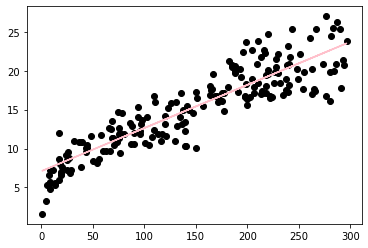

In [45]:
#graph between actual values and training values
plt.scatter(x , y , color='Black')
plt.plot(x_train, reg.predict(x_train) , color='Pink')
plt.show()

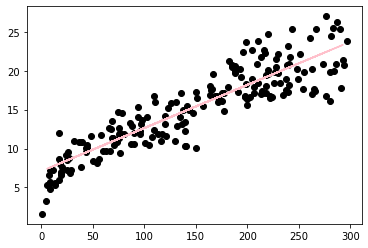

In [46]:
#graph between actual values and testing values
plt.scatter(x , y , color='Black')
plt.plot(x_test, reg.predict(x_test) , color='Pink')
plt.show()

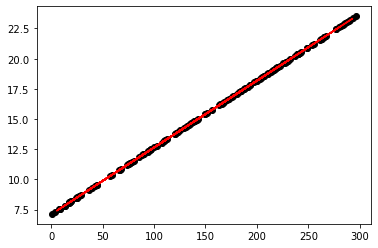

In [44]:
#graph between training values and testing values
plt.scatter(x_train , y_pred2, color='Black')
plt.plot(x_test , y_pred1 , color='Red')